# Lista 8 (10 pkt.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Zadanie 1 (2 pkt.)

Napisz funkcję $gen(a,b,p)$, która generuje listę punktów reprezentujących krzywą eliptyczną nad $\mathbb{Z}_p$ o równaniu $y^2=(x^3+ax+b)\mod p$.

In [2]:
def gen(a, b, p):
    list_of_points = []
    x_quadratic = [(x * x) % p for x in range(p)]
    ellipse = [((x ** 3) + a * x + b) % p for x in range(p)]
    for i in range(p):
        y_quadratic = ellipse[i]
        for j in range(p):
            if x_quadratic[j] == y_quadratic:
                list_of_points.append([i, j])
    return list_of_points

In [3]:
print(gen(-1,0,7)==[[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]])
print(gen(-1,0,11)==[[0, 0], [1, 0], [4, 4], [4, 7], [6, 1], [6, 10], [8, 3], [8, 8], [9, 4], [9, 7], [10, 0]])
print(gen(-1,1,7)==[[0, 1], [0, 6], [1, 1], [1, 6], [2, 0], [3, 2], [3, 5], [5, 3], [5, 4], [6, 1], [6, 6]])
print(gen(0,2,5)==[[2, 0], [3, 2], [3, 3], [4, 1], [4, 4]])

True
True
True
True


## Zadanie 2 (2 pkt.)

Napisz funkcję $add(P,Q,a,p)$, która dodaje do siebie punkty $P$ i $Q$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$. Wykorzystaj wzory z wykładu.

Uwaga 1: wszystkie operacje w tych wzorach są na ciele $\mathbb{Z}_p$ zatem tam gdzie mamy dzielenie mamy tak naprawdę mnożenie przez odwrotność w tym ciele, wykorzystaj tutaj funkcję $inv$ z poprzedniej listy, może być potrzeba ją nieco zmodyfikować, ponieważ może się tu pojawić dzielenie przez zero, które daje nam punkt "w nieskończości" (na wykładzie: $\mathcal{O}$).

Uwaga 2: Uwzględnij również, że zarówno w wyniku dodawania jak i w argumentach dodawanie może pojawić się punkt "w nieskończoności", zwracaj go jako $nan$, tj. za pomocą $float('nan')$, do sprawdzania czy coś jest $nan$ użyj $np.isnan()$.

In [4]:
def inv(p,n):
    x,y, u,v = 0,1, 1,0
    while(n > 0):
        r = p//n
        m = p%n
        new_u = x - u * r
        new_v = y - v * r
        p,n = n,m
        x,y = u, v
        u, v = new_u, new_v
    if(y<0):
        return y+new_v 
    return y

In [5]:
def add(P,Q,a,p):
    if (np.isnan(P[0]) or np.isnan(P[1])): 
        return Q
    elif (np.isnan(Q[0]) or np.isnan(Q[1])):
        return P
    elif (P[0]==Q[0] and P[1]==(-Q[1])%p):
        return [float('nan'),float('nan')]
    elif (P==Q):
        s = (3*(P[0]**2)+a) * inv(2*P[1],p)
    else:
        s = (Q[1]-P[1]) * inv(Q[0]-P[0],p)
    x = (s*s - P[0] - Q[0])%p
    y = (s*(P[0] - x) - P[1])%p
    points = [x,y]
    return points

In [6]:
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[4,2],-1,7)==[1,0])
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[float('nan'),float('nan')],-1,7)==[4,2])
print(np.isnan(add([float('nan'),float('nan')],[float('nan'),float('nan')],-1,7)))
print(np.isnan(add([0,0],[0,0],-1,7)))
print(add([2,0],[3,2],0,5)==[4,1])
print(np.isnan(add([2,0],[2,0],0,5)))

True
True
True
True
[ True  True]
[ True  True]
True
[ True  True]


W oparciu o poprzednią funkcję napisz funkcję $multiply(n,P,a,p)$, która mnoży punkt $P$ razy liczbę naturalną $n$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$, tzn. dodaje ten punkt do siebie $n$ razy.

In [7]:
def multiply(n,P,a,p):
    temp = P
    for i in range(1,n):
        temp = add(temp,P,a,p)
    return temp

In [8]:
print(multiply(3,[4,2],-1,7))

[4, 5]


In [9]:
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(3,[4,2],-1,7)==[4,5])
print(np.isnan(multiply(4,[4,2],-1,7)))
print(np.isnan(multiply(2,[float('nan'),float('nan')],-1,7)))
print(multiply(5,[2,0],0,5)==[2,0])
print(multiply(5,[3,3],0,5)==[3,2])

True
True
True
[ True  True]
[ True  True]
True
True


## Zadanie 3 (2 pkt.)

Narysuj na wykresie punkty ($plt.scatter()$) reprezentujące krzywą eliptyczną. Stosując funkjcę $multiply()$ przeanalizuj jaką grupę generuje kazdy z punktów tej krzywej, wypisz te grupy. Nie automatyzuj tego, tzn. operacje na punktach wykonuj stosując wcześniejsze funkcje ale analizę poszczególnych grup przeprowadź ręcznie.

Na przykład dla krzywej $y^2=x^3-5x$ nad ciałem $\mathbb{Z}_5$ mamy 5 punktów (łącznie z punktem w nieskończoności, którego nie ma na wykresie, 6 punktów):

<img src="fig.png" width="500"/>

Punkt $P_0$ generuje dwuelementową grupę:

{$P_0,\mathcal{O}$},

bo $2P_0=\mathcal{O}$,

punkt $P_1$ generuje pięcioelementową grupę:

{$P_1,P_3,P_4,P_2,\mathcal{O}$}

bo $2P_1=P_3,3P_1=P_4,4P_1=P_2,5P_1=\mathcal{O}$

pozostałe elementy $P_2,P_3,P_4$ generują dokładnie tą samą grupę, zatem na tej krzywej mamy określone dwie grupy jedną dwuelementową i jedną pięcioelementową.

Przeprowadź podobną analizę dla przykładów:
1. krzywa nad ciałem $\mathbb{Z}_7$ o równaniu $y^2=x^3-x$
2. krzywa nad ciałem $\mathbb{Z}_5$ o równaniu $y^2=x^3-2x+1$

In [10]:
#1. 
a=-1
b=0
p=7
points = gen(a,b,p)

In [11]:
points

[[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]]

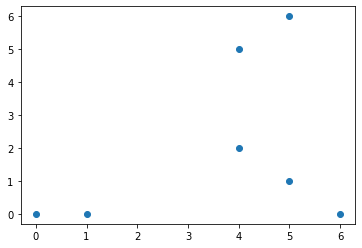

In [12]:
plt.scatter([p[0] for p in points], [p[1] for p in points])

In [13]:
print("Krzywa nad cialem Z7 o rownaniu y^2 = x^3 - x")
a = -1
b = 0
p = 7
print(f"a={a}, b={b}, p={p}")
points = gen(a,b,p)
print(f"punkty - {points}\n")
print(f"P[0] - grupa dwuelementowa: {[points[0],multiply(2,points[0],a,p)]}")
print(" 2P[0]=O\n")
print(f"P[1] - grupa dwuelementowa: {[points[1],multiply(2,points[1],a,p)]}")
print(" 2P[1]=O\n")
print(f"P[2] - grupa czteroelementowa: {[points[2],multiply(2,points[2],a,p),multiply(3,points[2],a,p),multiply(4,points[2],a,p)]}")
print(" 2P[2]=P[1], 3P[2]=P[3], 4P[2]=O \n")
print(f"P[3] - grupa czteroelementowa: {[points[3],multiply(2,points[3],a,p),multiply(3,points[3],a,p),multiply(4,points[3],a,p)]}")
print(" 2P[3]=P[1], 3P[3]=P[2], 4P[3]=O \n")
print(f"P[4] - grupa czteroelementowa: {[points[4],multiply(2,points[4],a,p),multiply(3,points[4],a,p),multiply(4,points[4],a,p)]}")
print(" 2P[4]=P[1], 3P[4]=P[5], 4P[4]=O \n")
print(f"P[5] - grupa czteroelementowa: {[points[5],multiply(2,points[5],a,p),multiply(3,points[5],a,p),multiply(4,points[5],a,p)]}")
print(" 2P[5]=P[1], 3P[5]=P[4], 4P[5]=O \n")
print(f"P[6] - grupa dwuelementowa: {[points[6],multiply(2,points[6],a,p)]}")
print(" 2P[6]=O\n")


Krzywa nad cialem Z7 o rownaniu y^2 = x^3 - x
a=-1, b=0, p=7
punkty - [[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]]

P[0] - grupa dwuelementowa: [[0, 0], [nan, nan]]
 2P[0]=O

P[1] - grupa dwuelementowa: [[1, 0], [nan, nan]]
 2P[1]=O

P[2] - grupa czteroelementowa: [[4, 2], [1, 0], [4, 5], [nan, nan]]
 2P[2]=P[1], 3P[2]=P[3], 4P[2]=O 

P[3] - grupa czteroelementowa: [[4, 5], [1, 0], [4, 2], [nan, nan]]
 2P[3]=P[1], 3P[3]=P[2], 4P[3]=O 

P[4] - grupa czteroelementowa: [[5, 1], [1, 0], [5, 6], [nan, nan]]
 2P[4]=P[1], 3P[4]=P[5], 4P[4]=O 

P[5] - grupa czteroelementowa: [[5, 6], [1, 0], [5, 1], [nan, nan]]
 2P[5]=P[1], 3P[5]=P[4], 4P[5]=O 

P[6] - grupa dwuelementowa: [[6, 0], [nan, nan]]
 2P[6]=O



Krzywa nad cialem Z5 o rownaniu y^2 = x^3 - x
a=-2, b=1, p=5
punkty - [[0, 1], [0, 4], [1, 0], [2, 0]] 

P[0] - grupa czteroelementowa: [[0, 1], [1, 0], [0, 4], [nan, nan]]
 2P[0]=P[2], 3P[0]=P[1], 4P[0]=O 

P[1] - grupa czteroelementowa: [[0, 4], [1, 0], [0, 1], [nan, nan]]
 2P[1]=P[2], 3P[1]=P[0], 4P[1]=O 

P[2] - grupa dwuelementowa: [[1, 0], [nan, nan]]
 2P[2]=O 

P[3] - grupa dwuelementowa: [[2, 0], [nan, nan]]
 2P[3]=O 



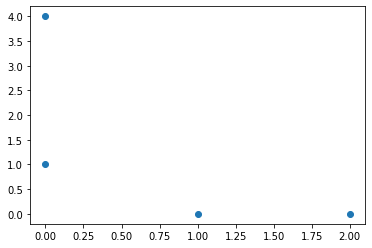

In [14]:
print("Krzywa nad cialem Z{} o rownaniu y^2 = x^3 - x".format(5))
a = -2
b = 1
p = 5
print(f"a={a}, b={b}, p={p}")
points = gen(a,b,p)
print(f"punkty - {points} \n")
i=0
print(f"P[{i}] - grupa czteroelementowa: {[points[i],multiply(2,points[i],a,p),multiply(3,points[i],a,p),multiply(4,points[i],a,p)]}")
print(f" 2P[{i}]=P[2], 3P[{i}]=P[1], 4P[{i}]=O \n")
i=1
print(f"P[{i}] - grupa czteroelementowa: {[points[i],multiply(2,points[i],a,p),multiply(3,points[i],a,p),multiply(4,points[i],a,p)]}")
print(f" 2P[{i}]=P[2], 3P[{i}]=P[0], 4P[{i}]=O \n")

i=2
print(f"P[{i}] - grupa dwuelementowa: {[points[i],multiply(2,points[i],a,p)]}")
print(f" 2P[{i}]=O \n")
i=3
print(f"P[{i}] - grupa dwuelementowa: {[points[i],multiply(2,points[i],a,p)]}")
print(f" 2P[{i}]=O \n")
plt.scatter([p[0] for p in points], [p[1] for p in points])

## Zadanie 4 (1 pkt)

Sprawdź numerycznie, korzystając z funkcji $gen()$, twierdzenie Hassego. Sprawdź, że ze wzrostem liczby pierwszej $p$ dla krzywej o parametrach $a=-1$, $b=0$ liczba punktów na krzywej podąża za oszacowaniem $p+1-2\sqrt{p}\leq\#E\leq p+1+2\sqrt{p}$. Narysuj wykres $\#E(p)$ i proste o równaniach $p+1-2\sqrt{p}$ oraz $p+1+2\sqrt{p}$.

Uwaga: Możesz wygenerować liczby pierwsze, np. w zakresie od 0 do 1000, za pomocą:

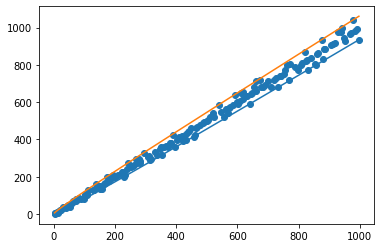

In [15]:
from sympy import primerange # modulo p = zwieksza ilosc punktow na krzywej do tego zakresu
primes = list(primerange(0,1000))
import math

a=-1
b=0

values = []
down = []
up =[]
for prime in primes:
    values.append(len(gen(a,b,prime)))
    down.append(prime+1-2*math.sqrt(prime))
    up.append(prime+1+2*math.sqrt(prime))
    
plt.scatter(primes,values)
plt.plot(primes, down)
plt.plot(primes, up)

lub jakkolwiek inaczej.

## Zadanie 5 (2 pkt.)

Napisz funkcję $ord(G,a,p)$ znajdującą rząd punktu $G$ na krzywej o parametrach $a$, $p$ (oznaczenia jak w poprzednich zadaniach). Rząd elementu to $n$ takie, że $nG=\mathcal{O}$. Znajdź punkt na krzywej o parametrach $a=-1$,$b=0$,$p=97$ o największym rzędzie, moze ich być więcej niż jeden, wybierz którykolwiek.

In [16]:
def ord(G,a,p):
    for i in range(100):
        conf = multiply(i, G, a, p)
        if np.isnan(conf[0]) or np.isnan(conf[1]):
            break
        i=-1
    return i

In [17]:
print(ord([4,4],-1,11)==3)
print(ord([8,8],-1,11)==6)
print(ord([3,2],-1,7)==3)
print(ord([3,5],-1,7)==3)
print(ord([3,2],0,5)==3)
print(ord([0,0],0,5)==2)

True
True
True
True
True
True


In [18]:
a=-1
b=0
p=97
points = gen(a,b,p)
max_ord = 0
print(points)
for point in points:
    curr_ord = ord(point,a,p)
    if(curr_ord>max_ord):
        max_ord=curr_ord
        result = point
        
print("point: {}, order: {}".format(result,max_ord))

[[0, 0], [1, 0], [2, 43], [2, 54], [3, 11], [3, 86], [6, 4], [6, 93], [13, 27], [13, 70], [15, 16], [15, 81], [16, 43], [16, 54], [18, 24], [18, 73], [19, 27], [19, 70], [21, 5], [21, 92], [22, 21], [22, 76], [27, 16], [27, 81], [28, 14], [28, 83], [30, 2], [30, 95], [32, 12], [32, 85], [37, 46], [37, 51], [42, 36], [42, 61], [45, 26], [45, 71], [46, 22], [46, 75], [48, 35], [48, 62], [49, 6], [49, 91], [51, 1], [51, 96], [52, 10], [52, 87], [55, 16], [55, 81], [60, 42], [60, 55], [65, 27], [65, 70], [67, 44], [67, 53], [69, 17], [69, 80], [70, 36], [70, 61], [75, 23], [75, 74], [76, 13], [76, 84], [78, 12], [78, 85], [79, 43], [79, 54], [81, 24], [81, 73], [82, 36], [82, 61], [84, 12], [84, 85], [91, 9], [91, 88], [94, 48], [94, 49], [95, 24], [95, 73], [96, 0]]
point: [6, 4], order: 20


## Zadanie 6 (1 pkt)

Prześledź działanie protokołu Diffiego-Helmana, jednak tym razem opertego o krzywe eliptyczne, i uzupełnij poszczególne kroki.

Alicja i Bob ustalają publicznie krzywą eliptyczą (czyli parametry $a$,$b$,$p$) w której będą działać oraz punkt na tej krzywej $G$. Weź krzywą z poprzedniego zadania oraz znaleziony w nim punkt.

In [19]:
a = -1
b = 0
G = [6, 4]
p = 97 #parametry krzywej i punkt G

Alicja wybiera losową liczbę naturalną $n$ z przedziału $[2,\#E-1]$, $\#E$ to liczba punktów na krzywej:

In [20]:
E=len(gen(a,b,p))
n = random.randint(2,E-1)
print(n)

75


Następnie oblicza $A=nG$ zgodnie z zasadami mnożenia punktów na krzywej przez liczbe naturalną:

In [21]:
A=multiply(n,G,a,p)
print(A)

[22, 21]


To samo robi Bob, wybiera losową liczbę naturalną $m$ i oblicza $B=mG$:

In [22]:
m=random.randint(2,E-1)
B=multiply(m,G,a,p)
print(m)
print(B)

49
[16, 43]


Liczby $n$ i $m$ są znane tylko, odpowiednio, Alicji i Bobowi, natomiast $A$ oraz $B$ są wymieniane publicznym kanałem. Bob otrzymuje $A$ i wykonuje operację $k_B=mA$, z kolei Alicja otrzymuje $B$ i wykonuje operację $k_A=nB$:

In [23]:
k_B=multiply(m,A,a,p)
k_A=multiply(n,B,a,p)

In [24]:
k_A==k_B #dysponuja tym samym kluczem  

True

Zawuażmy, że $k_A=k_B$, wynika to z tego, że $k_A=nB=nmG$ oraz $k_B=mA=mnG$ a oczywiście $nm=mn$. Zatem Alicja i Bob dysponują tą samą liczbą, którą mogą użyć jako klucz do szyfrowania. Publicznie znane są wartości $a$, $b$, $p$, $G$, $nG$ oraz $mG$, jednak odzyskanie z nich $n$ i $m$ jest bardzo trudne przy odpwiednim doborze krzywej i punktu na niej.

In [25]:
print(k_A)
print(k_B)

[22, 21]
[22, 21]
